# 2. Matrices

A basic understanding of python and numpy arrays is useful for understanding the code snippets.

1. [Basics](#1.-Basics)
2. [Matrix Operations](#.-Matrix-Operations)
3. [Linear Transformations](#.-Linear-Transformations)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. Basics

A matrix $A$ has *m* rows and *n* columns, often denoted as $\mathbb{R}^{m\times n}$.

Let $A \in \mathbb{R}^{4 \times 2}$ and $B \in \mathbb{R}^{2 \times 3}$, 
$
\begin{align}
A &= \begin{bmatrix}
       a_{1,1} & a_{1,2} \\
       a_{2,1} & a_{2,2} \\
       a_{3,1} & a_{3,2} \\
       a_{4,1} & a_{4,2} \\
     \end{bmatrix}
\end{align}
$
and 
$
\begin{align}
B &= \begin{bmatrix}
       b_{1,1} & b_{1,2} & b_{1,3} \\
       b_{2,1} & b_{2,2} & b_{2,3}\\
     \end{bmatrix}
\end{align}
$.

Operations like scaling, adding and subtracting matrices works the same as vectors, as long as the matrix sizes match.

### 1.1 Special Matrices

The Zero Matrix is denoted by $0_{m\times n}$.

In [2]:
np.zeros((3, 3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

The Identity Matrix $I_n$ is a zero matrix with ones in its diagonal.

In [3]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Then there is a diagonal matrix, where the diagonal equals some values, and the off-diagonal contains only zero's.

In [4]:
np.diag([1., 2., 3.])

array([[1., 0., 0.],
       [0., 2., 0.],
       [0., 0., 3.]])

An upper triangular matrix has the property that all components below the diagonal are zero. And for the lower triangular matrix, all components above the triangular are zero.

In [5]:
np.triu([[1., 2., 3.],[4., 5., 6.],[7., 8., 9.]], 0)

array([[1., 2., 3.],
       [0., 5., 6.],
       [0., 0., 9.]])

In a strict triangular matrix, the diagonal contains zero values as well.

In [6]:
np.tril([[1., 2., 3.],[4., 5., 6.],[7., 8., 9.]], -1)

array([[0., 0., 0.],
       [4., 0., 0.],
       [7., 8., 0.]])

Finally, a unit triangular matrix has one values along its diagonal. 

In [7]:
np.tril([[1., 2., 3.],[4., 5., 6.],[7., 8., 9.]], -1) + np.identity(3)

array([[1., 0., 0.],
       [4., 1., 0.],
       [7., 8., 1.]])

## 2. Matrix Operations

- Scaling
- Addition
- Subtraction
- Multiplication

### 2.1 Scaling

A scalar works on individual components.

In [8]:
A = np.matrix([
    [-4, 2],
    [-2, 0],
    [4, -6]])

b = 2

b * A

matrix([[ -8,   4],
        [ -4,   0],
        [  8, -12]])

### 2.2 Addition

As with vectors, the components of the resulting matrix are the sums of associated components from the matrices that are added up.

In [9]:
A = np.matrix([
    [-4, 2],
    [-2, 0],
    [4, -6]])

B = np.matrix([
    [2, -3],
    [6, 1],
    [0, 3]])

commutativity = lambda A, B: (A + B == B + A).all()
commutativity(A, B)

True

### 2.3 Subtraction

As with numbers, subtraction is neither commutative nor associative.

In [10]:
commutativity = lambda A, B: (A - B == B - A).all()
commutativity(A, B)

False

### 2.4 Matrix Vector Multiplication

$A$ can be multiplied with a vector $v$, where 

Let $A \in \mathbb{R}^{4 \times 2}$ and $v \in \mathbb{R}^2$, 
$
\begin{align}
A &= \begin{bmatrix}
       a_{1,1} & a_{1,2} \\
       a_{2,1} & a_{2,2} \\
       a_{3,1} & a_{3,2} \\
       a_{4,1} & a_{4,2} \\
     \end{bmatrix}
\end{align}
$ 
and
$
v = 
\begin{bmatrix}
    v_0 \\
    v_1
\end{bmatrix}
$.

Then 
$
Av = \begin{bmatrix}
       v_0a_{1,1} & v_1a_{1,2} \\
       v_0a_{2,1} & v_1a_{2,2} \\
       v_0a_{3,1} & v_1a_{3,2} \\
       v_0a_{4,1} & v_1a_{4,2} \\
     \end{bmatrix}
$.

In [11]:
A = np.matrix([
    [-4, 2],
    [-2, 0],
    [4, -6]])

x = np.array([0.5, 1])

numpy.dot(A, x)

matrix([[ 0., -1., -4.]])

### 2.4 Matrix Multiplication

$A$ can be multiplied with $B$ iff the number of columns of $A$ are equal to the amount of rows of $B$. The result will be $C \in \mathbb{R}^{4 \times 3}$, equal to the amount of rows of $A$, and the amount of columns of $B$.

![](https://notebooks.azure.com/menziess/libraries/Python-Linear-Algebra/raw/res%2FMatrix_multiplication_diagram_2.svg.png)

As shown in the image, components of the rows of the first matrix are multiplied and added to the components of the columns of the second matrix for each component in the resulting matrix.

Matrix multiplication does not commute, other than that, matrix multiplications have some interesting properties:

In [12]:
A = np.matrix([
    [2, -1],
    [0, 3]])

B = np.matrix([
    [1, 0],
    [2, 3]])

commutativity = lambda A, B: (A @ B == B @ A).all()
commutativity(A, B)

False

In [13]:
C = A @ B.T

associativity = lambda A, B, C: (A @ (B @ C) == (A @ B) @ C).all()
associativity(A, B, C)

True

In [14]:
distributivity = lambda A, B, C: (A @ (B + C) == A @ B + A @ C).all()
distributivity(A, B, C)

True

## 3. Linear Transformations

Some examples of linear transformations are:

- rotations
- reflections

### 3.1 Theorem - Linear Transformation

A vector function $L:\mathbb{R}^n \rightarrow \mathbb{R}^m$ is said to be a linear transformation if $\forall x,y \in \mathbb{R}^n$ and $a \in \mathbb{R}$ the following holds:

$$ L(ax) = aL(x) $$

$$ L(x + y) = L(x) + L(y)$$

Similarly, we have the theorem that states:

Let $\{v_0, v_1, ... , v_{k-1}\} \in \mathbb{R}^n$ $\{a_0, a_1, ..., a_{k-1}\} \in \mathbb{R}$, and let $L:\mathbb{R}^n \rightarrow \mathbb{R}^m$ be a linear transformation. Then

$$L(\alpha_0v_0 + a_1v_1 + ... + a_{k-1}v_{k-1}) = $$
$$a_0L(v_0) + a_1L(v_1) + ... + a_{k-1}L(v_{k-1})$$

In [15]:
x = np.array([1, 4, 5])
y = np.array([13, 24, -3])

def is_vector(v):
    """Validates input is vector"""
    if type(v) is not np.ndarray:
        raise ValueError('Expected np.ndarray')
        
def equal_vectors(v1, v2):
    map(is_vector, (v1, v2))
    return (v1 == v2).all()

In [16]:
def f(v):
    """Adds the index + 1 to each component"""
    is_vector(v)
    return v + list(range(1, v.size + 1))

def L(v):
    """Adds previous component result to current"""
    is_vector(v)
    x = 0
    res = np.zeros(v.size)
    for i, c in enumerate(v):
        res[i] = c + x
        x = res[i]
    return res
    
def is_linear_transformation(f):
    return (f(3.2 * x) == 3.2 * f(x)).all() and (f(x + y) == f(x) + f(y)).all()

print(is_linear_transformation(f))
print(is_linear_transformation(L))

False
True


### 3.2 Theorem - Transformation Matrix

A function $f:\mathbb{R}^n \rightarrow \mathbb{R}^m$ is a linear transformation iff it can be written as a matrix-vector multiplication. So, $L(x) = Ax$, where $A \in \mathbb{R}^{m\times n}$. Say, we have the following transformation:

$
f\begin{pmatrix}
 \begin{pmatrix}
   \chi_0 \\
   \chi_1
 \end{pmatrix}
 \end{pmatrix}
$$= 
\begin{pmatrix}
   \chi_0 + \chi_1 \\
   \chi_1
\end{pmatrix} 
$

If we apply $f$ to the first unit basis vectors, we get their results:

$
f\begin{pmatrix}
 \begin{pmatrix}
   1 \\
   0
 \end{pmatrix}
 \end{pmatrix}
$$= 
\begin{pmatrix}
   1 \\
   1
\end{pmatrix} 
$
and
$
f\begin{pmatrix}
 \begin{pmatrix}
   0 \\
   1
 \end{pmatrix}
 \end{pmatrix}
$$= 
\begin{pmatrix}
   1 \\
   0
\end{pmatrix}
$

The results form the matrix $A$:

$
A = \begin{bmatrix}
       1 & 1 \\
       1 & 0
     \end{bmatrix}
$.

Now, if we multiply, we get the original expression $Ax = f(x)$:

$ Ax = 
\begin{bmatrix}
   1 & 1 \\
   1 & 0
\end{bmatrix}$$
\begin{bmatrix}
   \chi_0 \\
   \chi_1
\end{bmatrix}
 $$=
\begin{pmatrix}
   \chi_0 + \chi_1 \\
   \chi_0
\end{pmatrix}
$
      
Therefore, $f$ is a linear transformation.

In [17]:
def L(v):
    """Linear transformation"""
    is_vector(v)
    return np.array([v[0] + v[1], v[0]])

# Transformation matrix
A = np.matrix([
    [1, 1],
    [1, 0]
])

x = np.array([2, 3])

equal_vectors(numpy.dot(A, x).A1, L(x))

True

### 3.3 Solving For a Linear Transformation

Let $L$ be a Linear Transformation such that 

$
L\begin{pmatrix}
 \begin{pmatrix}
   1 \\
   0
 \end{pmatrix}
 \end{pmatrix}
$$= 
\begin{pmatrix}
   3 \\
   5
\end{pmatrix}
$ and 
$
L\begin{pmatrix}
 \begin{pmatrix}
   0 \\
   1
 \end{pmatrix}
 \end{pmatrix}
$$= 
\begin{pmatrix}
   2 \\
   -1
\end{pmatrix}
$

What is $
L\begin{pmatrix}
 \begin{pmatrix}
   2 \\
   3
 \end{pmatrix}
 \end{pmatrix}
 ?
$

This problem can be solved with the knowledge that vectors can be written as a linear combination of their components and unit basis vectors:

$
L\begin{pmatrix}
 \begin{pmatrix}
   2 \\
   3
 \end{pmatrix}
 \end{pmatrix}
 = L(2e_0 + 3e_1)
$

$\qquad = 2L(e_0) + 3L(e_1)$

$\qquad = 2L
\begin{pmatrix}
  \begin{pmatrix}
   1 \\
   0
  \end{pmatrix}
  \end{pmatrix} 
$$+ 3L
\begin{pmatrix}
  \begin{pmatrix}
   0 \\
   1
  \end{pmatrix}
  \end{pmatrix} 
$

Substituting the linear transformations by their given results:

$\qquad = 2
\begin{pmatrix}
   3 \\
   5
\end{pmatrix} 
$$ + 
3\begin{pmatrix}
   2 \\
   -1
\end{pmatrix} 
$

$\qquad = 
\begin{pmatrix}
   2 \times 3 & + & 3 \times 2\\
   2 \times 5 & + & 3 \times (-1)
\end{pmatrix} 
$

$\qquad = 
\begin{pmatrix}
   12 \\
   7
\end{pmatrix} 
$

### 3.4 Trigonometry Rotation

When we take a look at the unit circle, the $x$ and $y$ coordinates on the circle are given by $sin$ and $cos$ respectively. Notice that we iterate over the range $[0, 2\pi]$, because the circumference of a circle is $2\pi r$, and for a unit circle $r=1$.

In [18]:
# plt.quiver is used to plot vectors, omitting the origin will
# create the same result as providing the (0, 0) origin
origin = [0], [0]

# To speed up creating plots, we create a wrapper function that accepts
# vectors, the origin, and colors for each respective vector
def plot_vectors_on_unit_circle(*vectors, origins = origin, groups = None, color = None):
           
    # Convert vectors to np array
    V = np.array(vectors)
    
    # Create range from 0 to 2pi and plot black circle
    t = np.linspace(0, 2 * np.pi, 100)
    plt.plot(sin(t), cos(t), color='black')
        
    # Create quiver plot
    plt.quiver(*origins, V[:, 0], V[:, 1], angles = 'xy', scale_units = 'xy', scale = 1, color = color)
    plt.xlim(-1.7, 1.7)
    plt.ylim(-1.1, 1.1)
    plt.grid()
    plt.show()

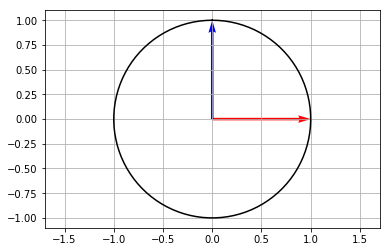

In [19]:
e0 = np.array([1, 0])
e1 = np.array([0, 1])

plot_vectors_on_unit_circle(e0, e1, color=['r', 'b'])

If we rotate the unit basis vectors by $\theta$, we can compute the landing coordinates of the vectors using trigonometry.

![](/menziess/libraries/Python-Linear-Algebra/raw/res%2FTrigonometry_first.png)

Rotating the first unit basis vector by an angle $\theta$, we get the unit vector 
$
R_\theta(
\begin{pmatrix}
   1 \\
   0
\end{pmatrix}
)
$.

The x coordinate is $cos(\theta)$, and the y coordinate is $sin(\theta)$.
So the landing spot is:
$
\begin{pmatrix}
   cos(\theta) \\
   sin(\theta)
\end{pmatrix}
$.

![](/menziess/libraries/Python-Linear-Algebra/raw/res%2FTrigonometry_second.png)

Similarly, rotating the second unit basis vector by an angle $\theta$, we get the unit vector 
$
R_\theta(
\begin{pmatrix}
   0 \\
   1
\end{pmatrix}
)
$ which lands at:
$
\begin{pmatrix}
   -sin(\theta) \\
   cos(\theta)
\end{pmatrix}
$.

The rotation of some vector $x$, 
$
R_\theta(x) = R_\theta
\begin{pmatrix}
\begin{pmatrix}
   \chi_0 \\
   \chi_1
\end{pmatrix}
\end{pmatrix}
$ is equal to the matrix vector multiplication:

$
\begin{pmatrix}
   R_\theta(
    \begin{pmatrix}
       1 \\
       0
    \end{pmatrix}
    )
   &
   R_\theta(
    \begin{pmatrix}
       0 \\
       1
    \end{pmatrix}
    )
\end{pmatrix}
\begin{pmatrix}
   \chi_0 \\
   \chi_1
\end{pmatrix}
$ 
for which we know the separate landing spots
$
\begin{pmatrix}
       cos(\theta) & -sin(\theta) \\
       sin(\theta) & cos(\theta)
\end{pmatrix}
\begin{pmatrix}
   \chi_0 \\
   \chi_1
\end{pmatrix}
$

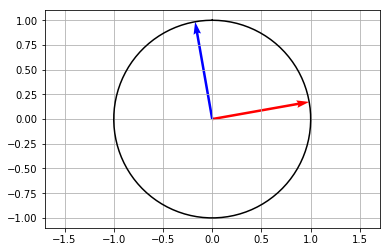

In [20]:
theta = math.radians(10)
e0 = np.array([cos(theta), sin(theta)])
e1 = np.array([-sin(theta), cos(theta)])

plot_vectors_on_unit_circle(e0, e1, color=['r', 'b'])